In [2]:
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 

data = pd.read_csv('Churn.csv')
print(data)

     state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              

In [2]:
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [3]:
data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

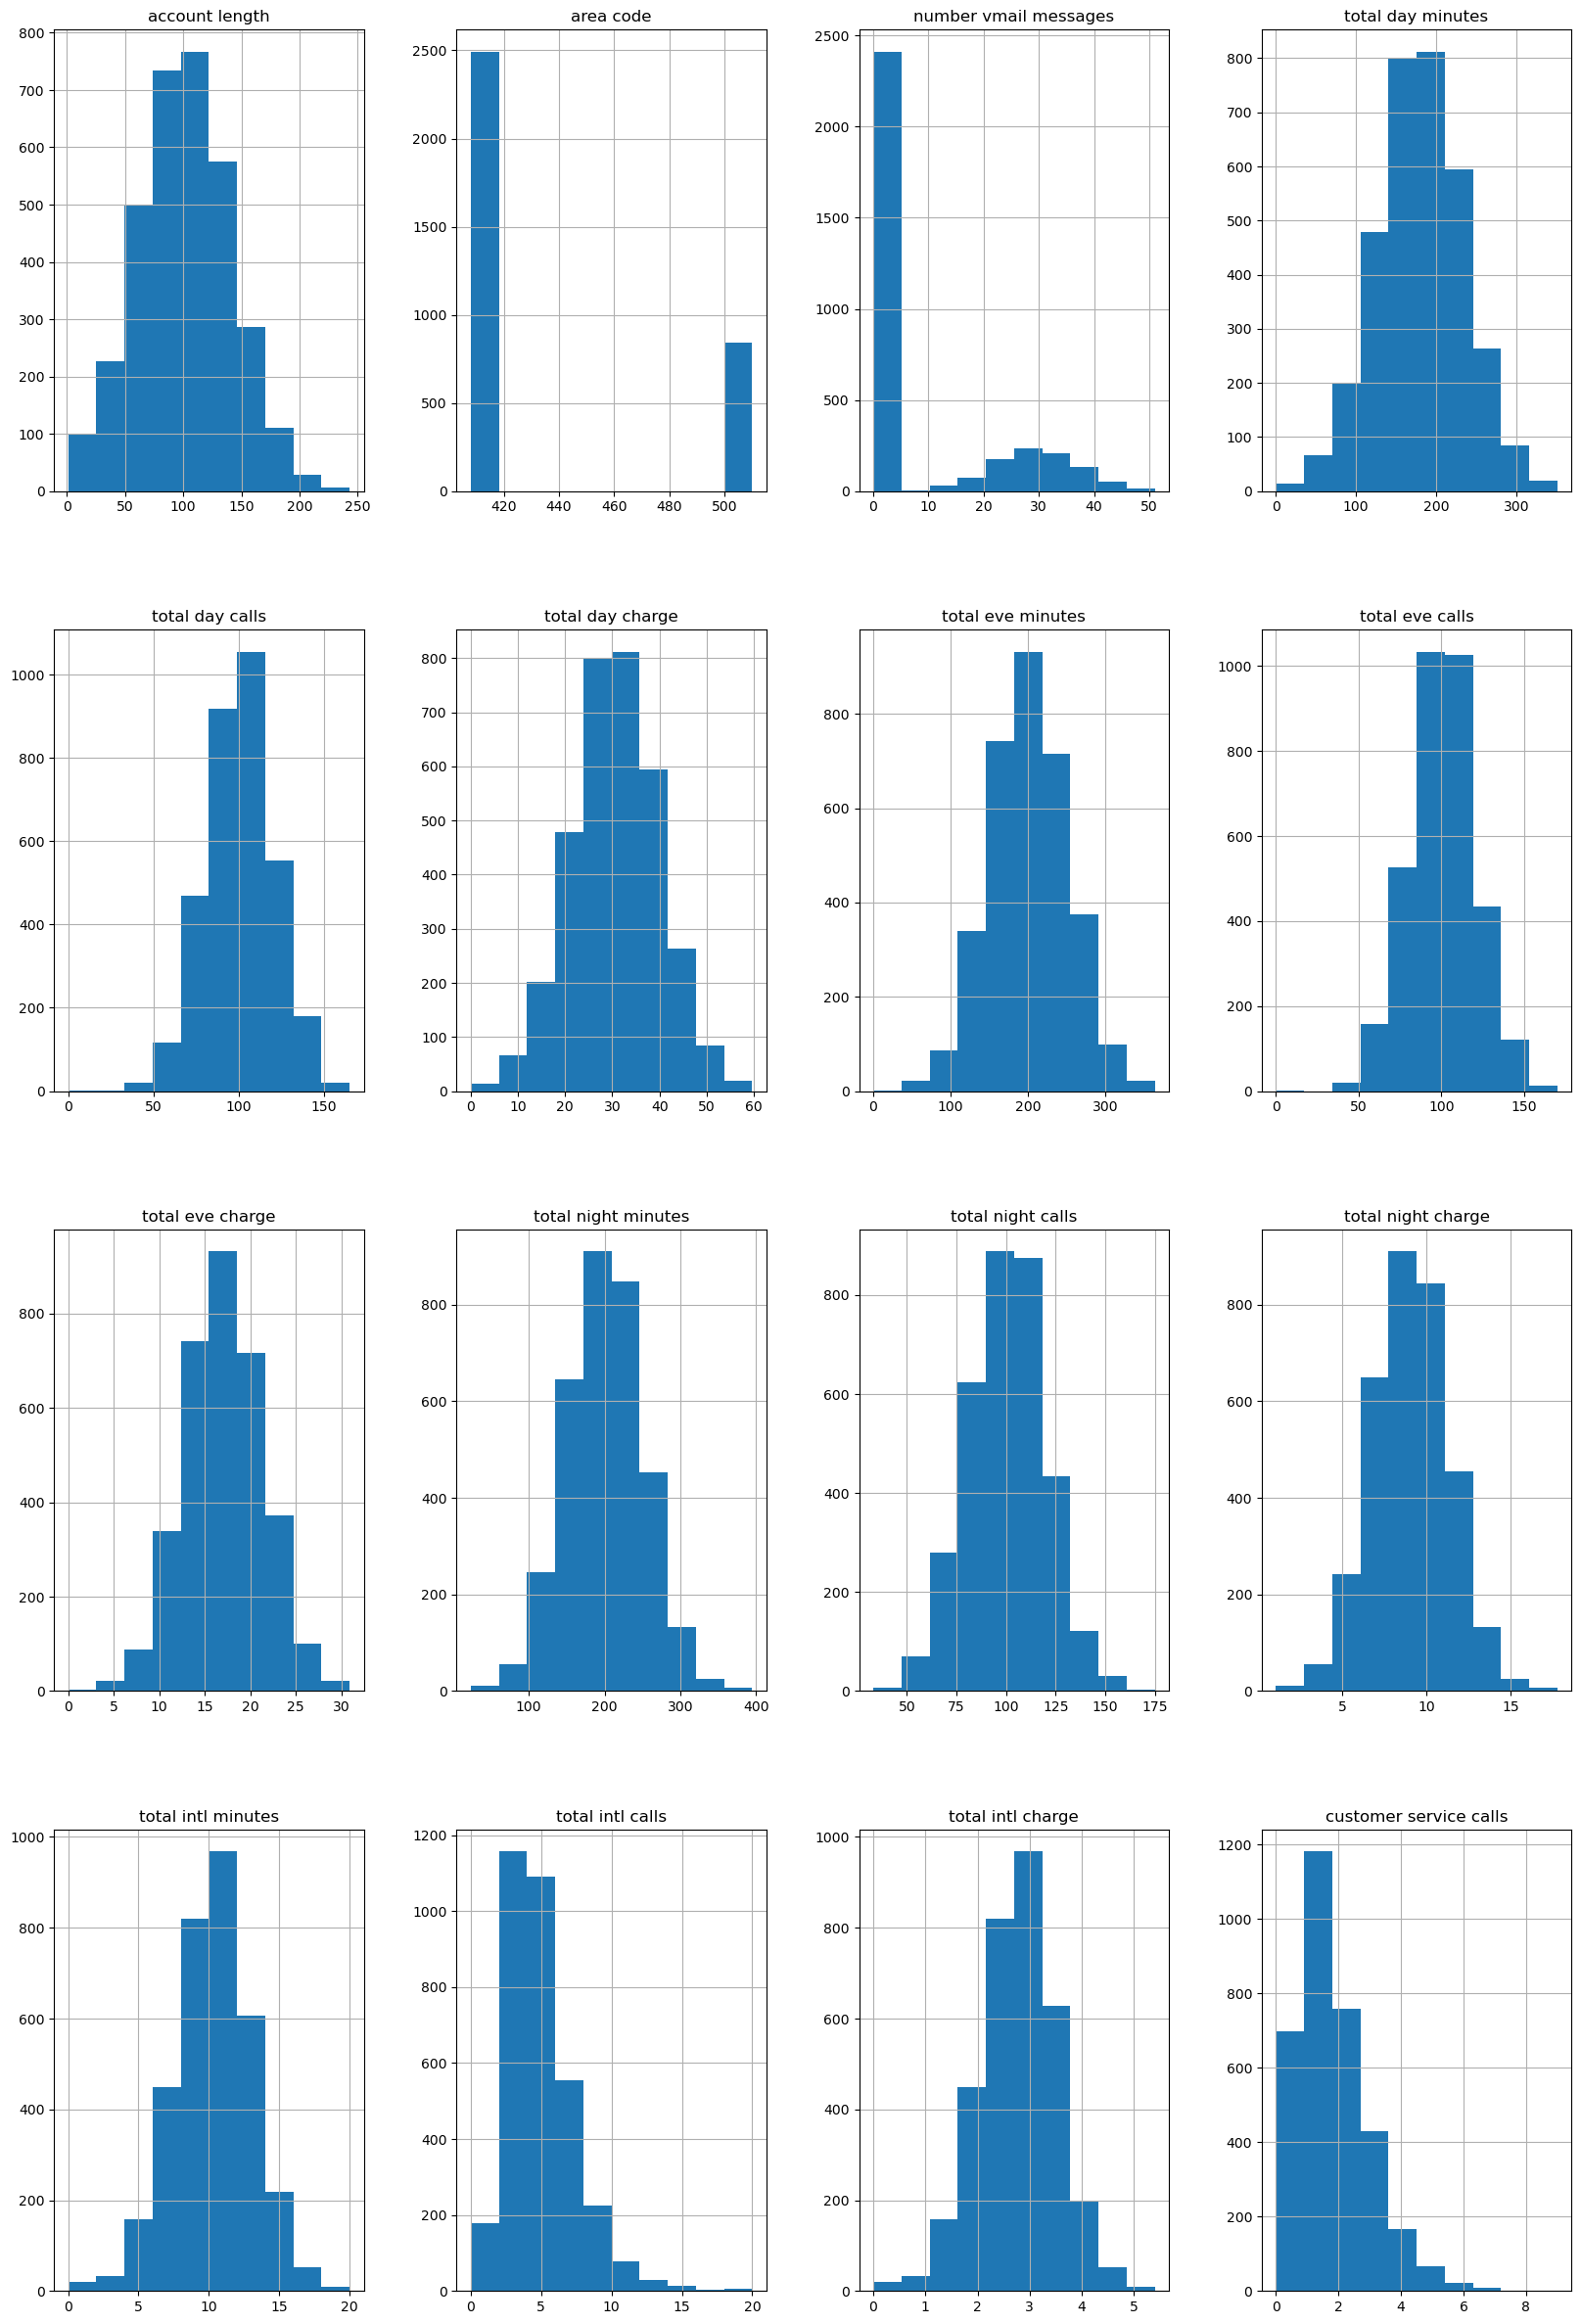

In [11]:

data.hist(figsize=(20,30))
plt.show()

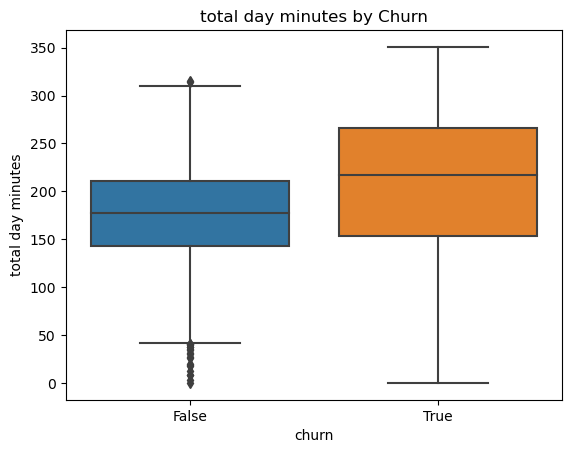

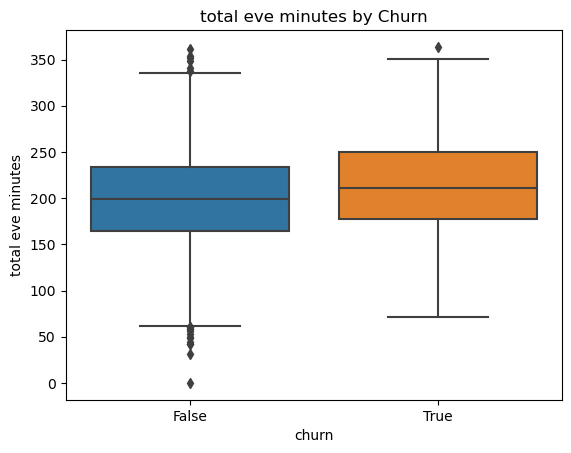

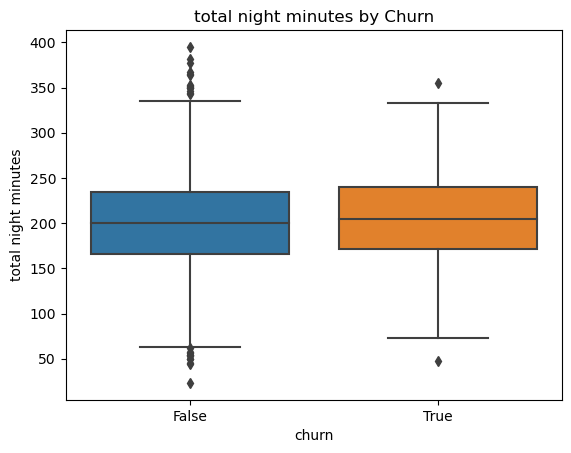

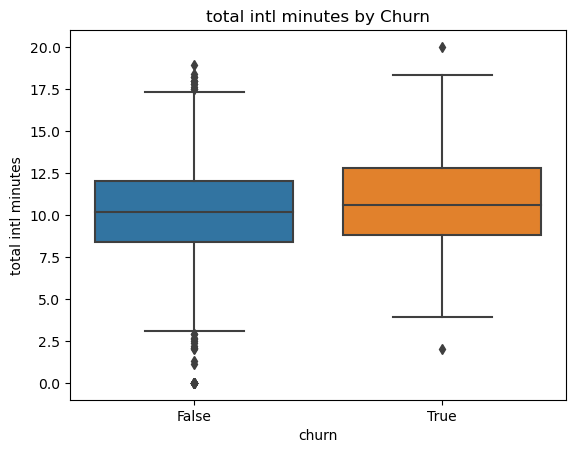

In [27]:
numerical_columns = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

for feature in numerical_columns:
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'{feature} by Churn')
    plt.show()


-Customers using more daytime minutes are more likely to leave, indicating daytime use may lead to dissatisfaction in the services.

-Evening and night usage is less relevant: There’s little difference in minutes used between customers who stay and those who churn at these times.

-Retain customers by offering tailored plans or support for those with high daytime usage to reduce churn.

In [18]:
print(data["total day calls"].sum())
print(data["total night calls"].sum())
print(data["total eve calls"].sum())
print(data["total intl calls"].sum())

334752
333659
333681
14930


-The most number of calls amogst all is of day calls
-Here we can also observe that the Total international calls have minimal impact on churn, so we might need to focus on creating more offers for interenational call usage. 

<Axes: xlabel='customer service calls', ylabel='count'>

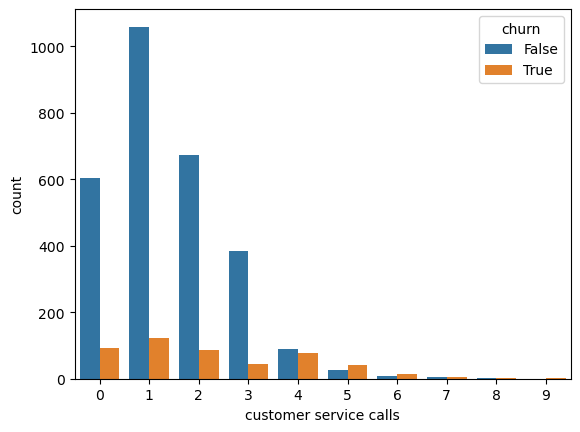

In [23]:
sns.countplot(x="customer service calls",hue="churn",data=data)

-Calls that are being recieved at the customer service center are not upto the mark in keeping the churning customers

-Majority of the customer's who don't churn tends to call less than 2 times with approximatley 18% of them not calling once.

-As the number of call increses the likelihood of the people calling back also decreses regardless of their churn choice. 

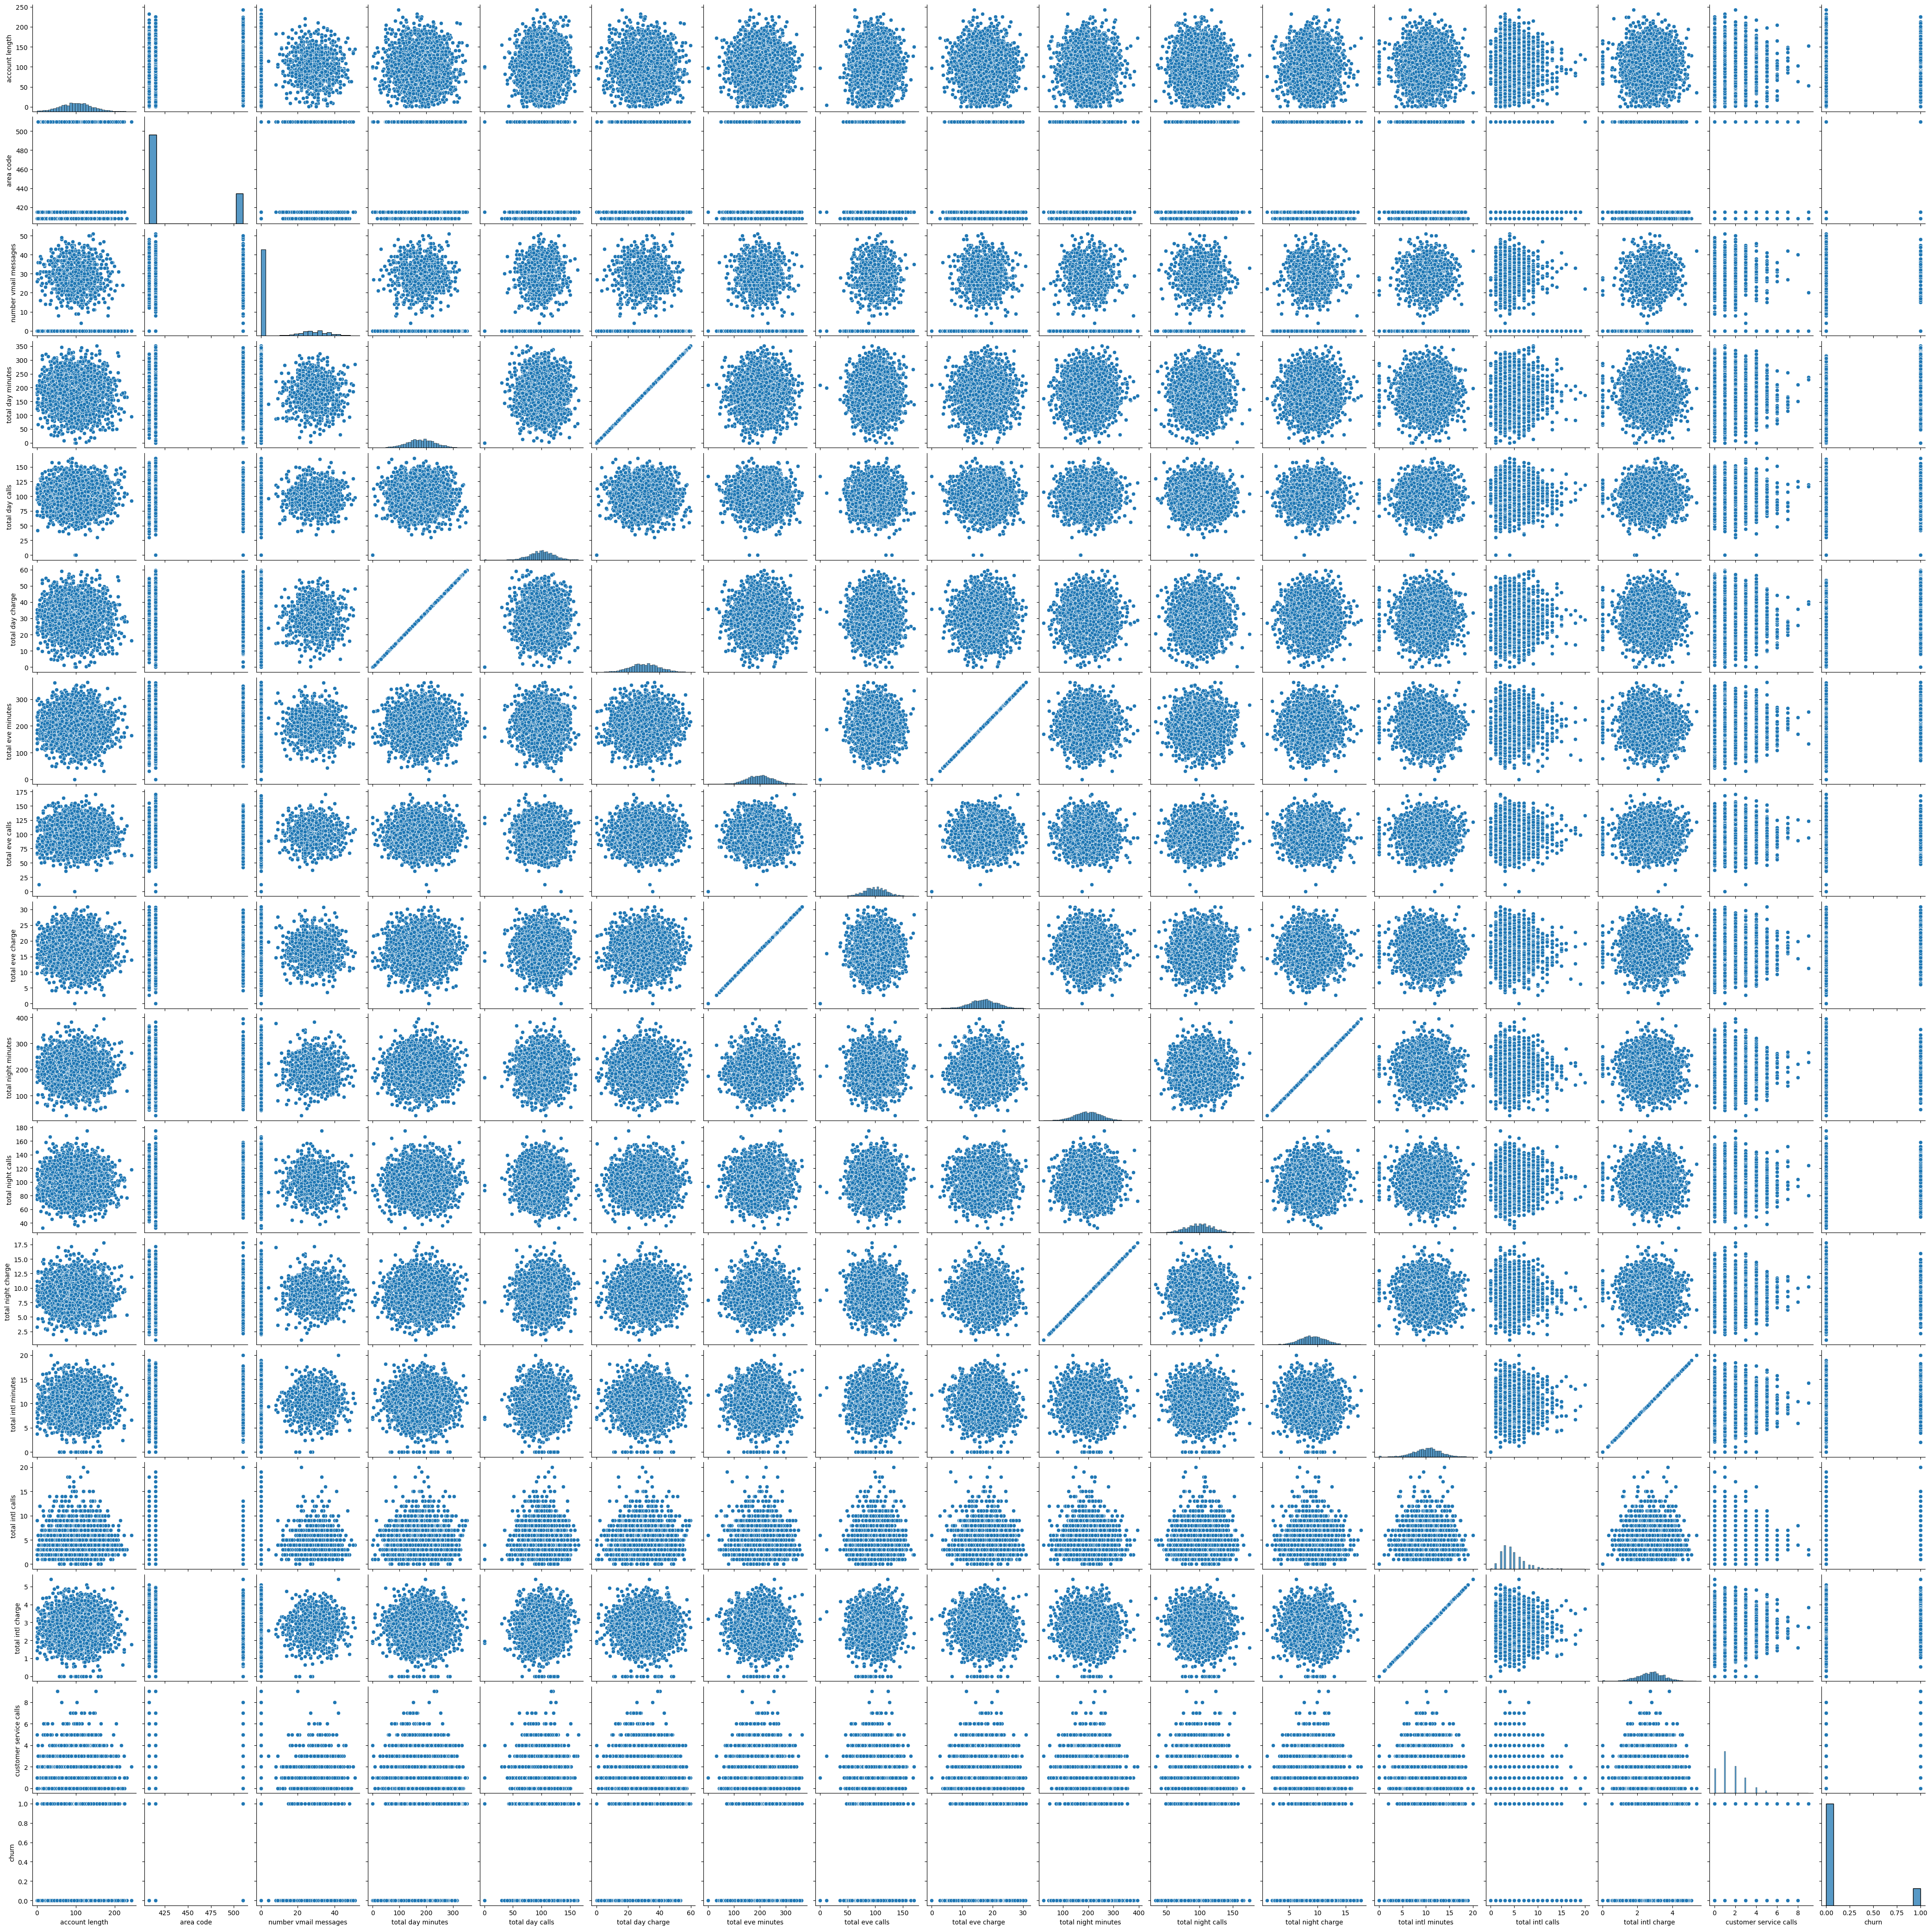

In [9]:
sns.pairplot(data)

In [11]:
data1=data.drop(['state','international plan','voice mail plan','phone number','churn'],axis=1)
m = data1.corr()
print(m)

                        account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl m

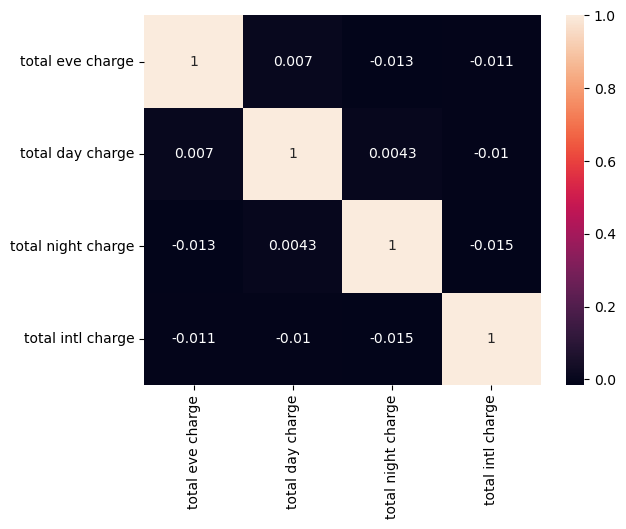

In [19]:
df = data1[['total eve charge','total day charge','total night charge', 'total intl charge']]

sns.heatmap(df.corr(), annot=True)
plt.show()

-Total evening charge and total day charge have a very weak positive correlation (0.007)

-The diagonal values (1.0) indicate perfect correlation of each variable with itself

-The correlations can be observed with very weak relationships between the different charges

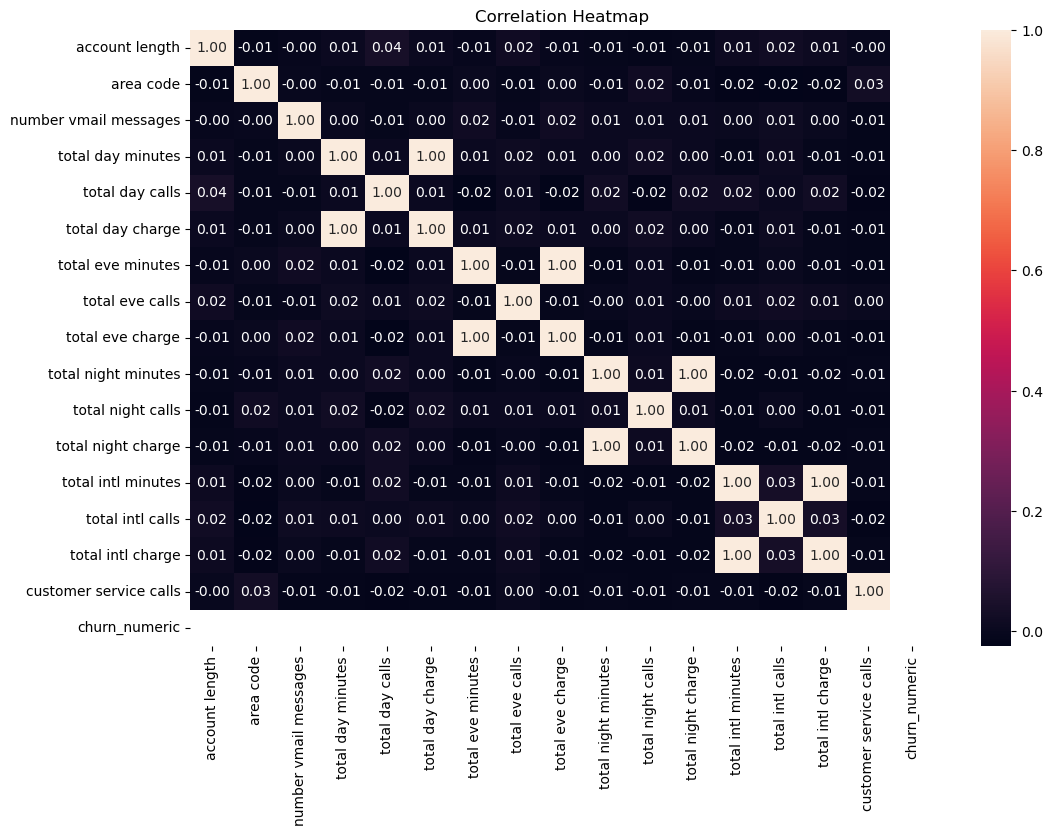

In [37]:
data1=data.drop(['state','international plan','voice mail plan','phone number','churn'],axis=1)


plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


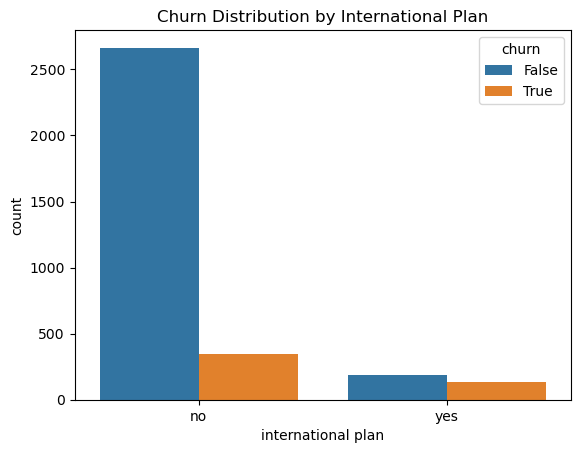

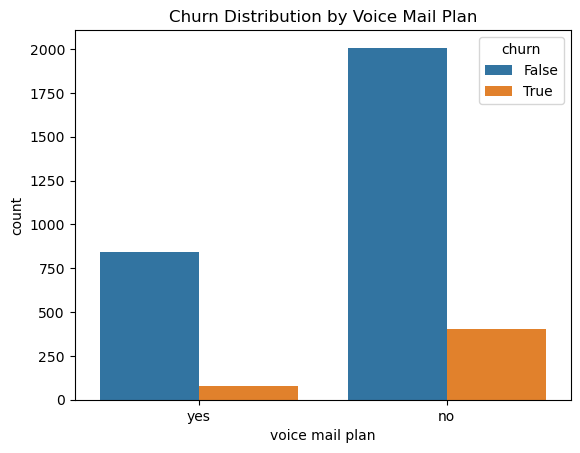

In [39]:

sns.countplot(x='international plan', hue='churn', data=data)
plt.title('Churn Distribution by International Plan')
plt.show()

sns.countplot(x='voice mail plan', hue='churn', data=data)
plt.title('Churn Distribution by Voice Mail Plan')
plt.show()


-Customers who do not have either an International or Voice Mail plan tend to be less likely to churn.

-The presence of these plans seems to have a limited effect on reducing churn.

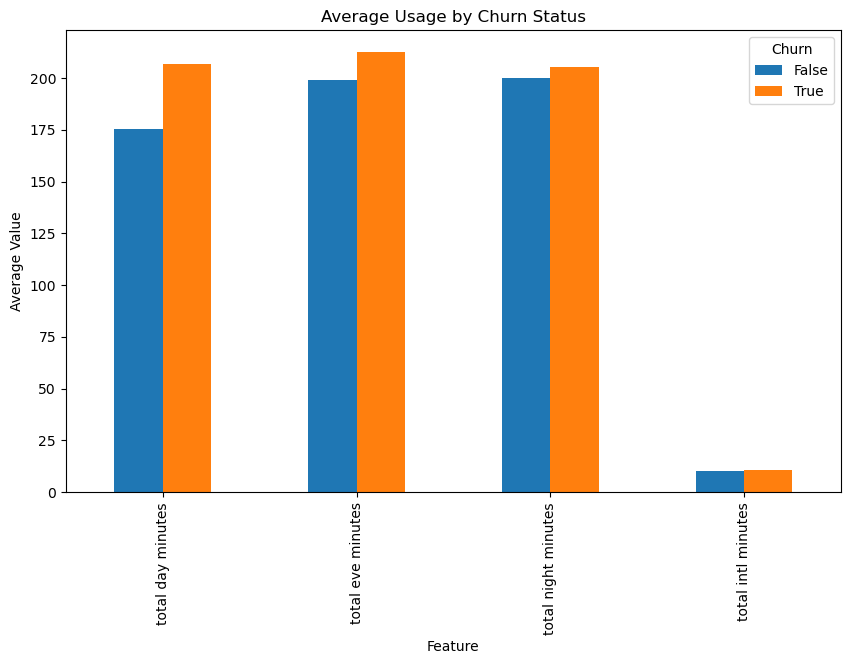

In [40]:

usage_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
mean_values = data.groupby('churn')[usage_features].mean().T


mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Average Usage by Churn Status')
plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.legend(title='Churn')
plt.show()


-On an Average people who tend to leave have higher average consumaption of day, evening and night minutes. 

-Both of the types of the customer have almost similar average international minutes as one another. 

/var/folders/wl/1t72yv3d5m9b_863chg3ddk80000gn/T/ipykernel_41834/1096503749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['churn'])
/Users/pranavsharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


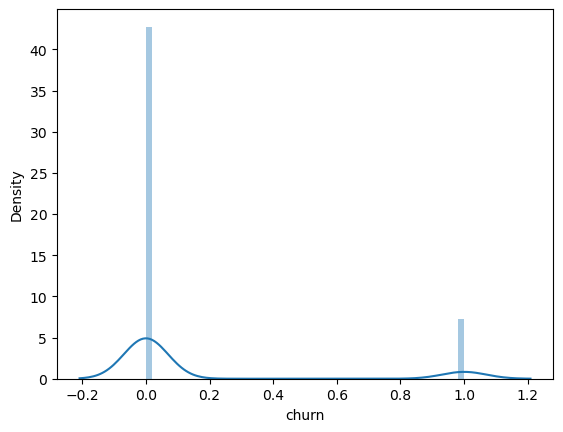

In [47]:

sns.distplot(data['churn'])
plt.show()

## Summary:

    - Churned customers consistently show lower average minutes across all categories (day, evening, and night).
    - Not churned customers exhibit significantly more usage, suggesting a correlation between higher usage and customer retention.
    - The low averages in international calls for both groups indicate that it may not be a significant usage area for customers in general.
    - We can observe that peak at 0, indicating that most observations have a churn value close to zero, suggesting low churn rates.
    - We can also observe that evening and night calls do not contribute to the churn decision. 
    - Customers using more daytime minutes are more likely to leave, indicating daytime use may lead to dissatisfaction in the services.
    - Suggetions to setup advertisement to boost international plans. 
    
    
    